In [23]:
import pandas as pd
import numpy as np
import datetime
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [24]:
df = pd.read_csv('turnstile_180922.csv')

current_d = datetime.datetime(2018, 9, 22)

In [12]:
#this is for more data
# for i in range(0,1):
#     #modify the .csv string
#     new_date = current_d - datetime.timedelta(days = 7*(i+1))
#     url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_' + new_date.strftime('%y%m%d') + '.txt'
#     #modify the df name
#     dft = pd.read_csv(url)
#     dfs = [df, dft]
#     pd.concat(dfs)

In [13]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,00:00:00,REGULAR,6759219,2291425
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,04:00:00,REGULAR,6759234,2291429
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,08:00:00,REGULAR,6759251,2291453
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,12:00:00,REGULAR,6759330,2291532
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/15/2018,16:00:00,REGULAR,6759538,2291574


In [26]:
# Cleaning up column names
df.rename(columns=lambda x: x.strip(),inplace='True')

df.rename(columns={'ENTRIES': 'CUMULATIVE_ENTRIES', 'EXITS': 'CUMULATIVE_EXITS'}, inplace=True)

In [27]:
# df3 = df[(df['STATION'] == '59 ST')].copy()

# #Remove times which are not 0h,4h,8h,12h,16h or 20h
# df3 = df3[(df3['TIME'] == '00:00:00') | \
#           (df3['TIME'] == '04:00:00') | \
#           (df3['TIME'] == '08:00:00') | \
#           (df3['TIME'] == '12:00:00') | \
#           (df3['TIME'] == '16:00:00') | \
#           (df3['TIME'] == '20:00:00')].copy()



# df3 = df3.groupby(['DATE','TIME']).sum()

# # Calculating net entries, net exits and net traffic
# df3['NET_ENTRIES'] = df3['CUMULATIVE_ENTRIES'].diff()

# df3['NET_EXITS'] = df3['CUMULATIVE_EXITS'].diff()

# df3['NET_TRAFFIC'] = df3['NET_EXITS'] + df3['NET_ENTRIES']



# # Plot of all SCPs summed for one station
# df3.NET_TRAFFIC.plot()



In [28]:
idx = pd.IndexSlice

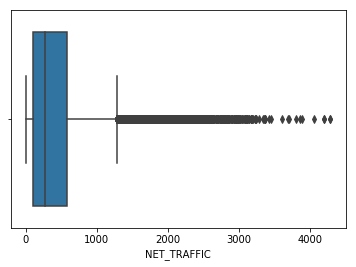

In [58]:
#clean data
date = '09/15/2018'
time = '08:00:00'

df4 = df[(df['TIME'] == '00:00:00') | \
          (df['TIME'] == '04:00:00') | \
          (df['TIME'] == '08:00:00') | \
          (df['TIME'] == '12:00:00') | \
          (df['TIME'] == '16:00:00') | \
          (df['TIME'] == '20:00:00')].copy()

df4['NET_ENTRIES'] = df4['CUMULATIVE_ENTRIES'].diff()

df4['NET_EXITS'] = df4['CUMULATIVE_EXITS'].diff()

df4['NET_TRAFFIC'] = df4['NET_EXITS'] + df4['NET_ENTRIES']



df4 = df4[(df4['NET_ENTRIES'] > 0) & (df4['NET_ENTRIES'] < 10000) & (df4['NET_EXITS'] > 0) & (df4['NET_EXITS'] < 10000)]

df4[(df4.TIME == '00:00:00') & (df4.DATE == '09/15/2018')] = np.nan

df4.dropna(inplace = True)
sns.boxplot(df4.NET_TRAFFIC)

In [59]:
df5 = df4[df4['STATION'] == 'TIMES SQ-42 ST'].sort_values('NET_ENTRIES',ascending = False)
df5 = df5.groupby(['DATE','TIME']).sum()
df5

#df5 = df4.loc[(idx[:], '09/15/2018', '08:00:00'), :]

# plt.scatter(df4, df4.NET_TRAFFIC)
# df4 = df4.groupby(['STATION','DATE','TIME']).sum()
# #df4 = df4[not((df4['TIME'] == '00:00:00') & (df4['DATE'] == '09/15/2018'))]
# df4.loc[(idx[:], '09/15/2018', '00:00:00'), :] = np.nan
# df4.dropna(inplace=True)
# df5 = df4.loc[(idx[:], '09/15/2018', '08:00:00'), :]
# df5

CUMULATIVE_ENTRIES  CUMULATIVE_EXITS  NET_ENTRIES  \
DATE       TIME                                                          
09/15/2018 04:00:00        3.812071e+09      1.783547e+09       6289.0   
           08:00:00        3.932697e+09      1.801466e+09       2024.0   
           12:00:00        3.932705e+09      1.801479e+09       8064.0   
           16:00:00        3.932720e+09      1.801500e+09      14314.0   
           20:00:00        3.932741e+09      1.801523e+09      21524.0   
09/16/2018 00:00:00        3.932762e+09      1.801535e+09      20702.0   
           04:00:00        3.880378e+09      1.800836e+09       6646.0   
           08:00:00        3.932770e+09      1.801539e+09       1656.0   
           12:00:00        3.932777e+09      1.801549e+09       6450.0   
           16:00:00        3.932788e+09      1.801568e+09      11088.0   
           20:00:00        3.932805e+09      1.801584e+09      17623.0   
09/17/2018 00:00:00        3.932821e+09      1.801591e+09      15402.0   
           04:00:00        3.862847e+09      1.783223e+09       2728.0   
           08:00:00        3.932830e+09      1.801601e+09       6158.0   
           12:00:00        3.932844e+09      1.801637e+09      14381.0   
           16:00:00        3.936093e+09      1.803622e+09      16389.0   
           20:00:00        3.936137e+09      1.803643e+09      43813.0   
09/18/2018 00:00:00        2.205101e+09      6.185724e+08      14425.0   
           04:00:00        3.936156e+09      1.803650e+09       4575.0   
           08:00:00        3.936162e+09      1.803660e+09       5949.0   
           12:00:00        3.936176e+09      1.803696e+09      13878.0   
           16:00:00        3.899754e+09      1.715262e+09      16312.0   
           20:00:00        3.936234e+09      1.803732e+09      41686.0   
09/19/2018 00:00:00        3.936252e+09      1.803739e+09      17641.0   
           04:00:00        3.815116e+09      1.785747e+09       3302.0   
           08:00:00        3.936260e+09      1.803748e+09       5354.0   
           12:00:00        3.936274e+09      1.803780e+09      13383.0   
           16:00:00        3.936290e+09      1.803798e+09      16240.0   
           20:00:00        3.936329e+09      1.803820e+09      38824.0   
09/20/2018 00:00:00        3.936348e+09      1.803827e+09      18772.0   
           04:00:00        3.808470e+09      1.784010e+09       3004.0   
           08:00:00        3.936357e+09      1.803837e+09       6097.0   
           12:00:00        3.936372e+09      1.803874e+09      15124.0   
           16:00:00        3.936390e+09      1.803893e+09      17780.0   
           20:00:00        3.936434e+09      1.803917e+09      44234.0   
09/21/2018 00:00:00        3.936455e+09      1.803925e+09      21058.0   
           04:00:00        3.866119e+09      1.785701e+09       3760.0   
           08:00:00        3.936465e+09      1.803935e+09       5820.0   
           12:00:00        3.936479e+09      1.803969e+09      14413.0   
           16:00:00        3.936498e+09      1.803988e+09      18963.0   
           20:00:00        3.936539e+09      1.804014e+09      40843.0   

                     NET_EXITS  NET_TRAFFIC  
DATE       TIME                              
09/15/2018 04:00:00     1779.0       8068.0  
           08:00:00     3670.0       5694.0  
           12:00:00    13631.0      21695.0  
           16:00:00    20886.0      35200.0  
           20:00:00    22275.0      43799.0  
09/16/2018 00:00:00    11964.0      32666.0  
           04:00:00     2051.0       8697.0  
           08:00:00     2109.0       3765.0  
           12:00:00    10450.0      16900.0  
           16:00:00    18424.0      29512.0  
           20:00:00    16539.0      34162.0  
09/17/2018 00:00:00     7117.0      22519.0  
           04:00:00      917.0       3645.0  
           08:00:00     9213.0      15371.0  
           12:00:00    35321.0      49702.0  
           16:00:00    16766.0      33155.0  
          

In [95]:
plt.subplot?

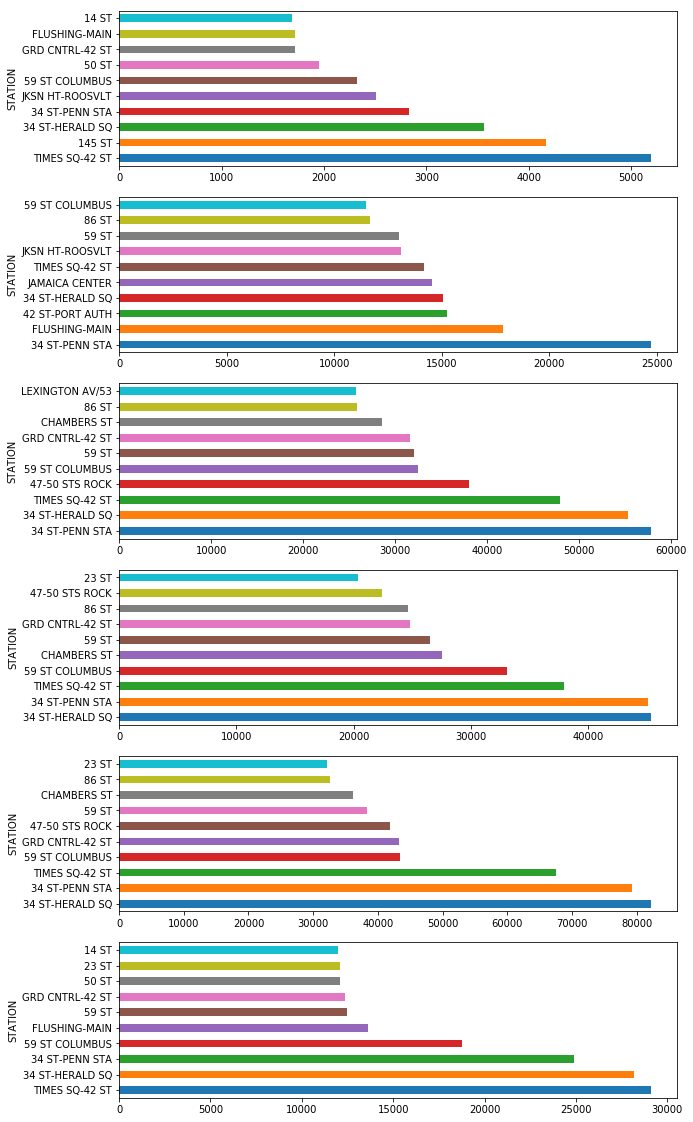

In [179]:
#find all stations in one specific time

date_list = list(df4.DATE.unique())
time_list = list(df4.TIME.unique())

all_shifts_series = []
all_shifts_df = []

#constructs list that contains pd series that contains the top 10 busiest stations for each datetime
#made list that contains other columns but same rows and groupby
for date in date_list:
    for time in time_list:
            df_one = df4[(df4.DATE == date) & (df4.TIME == time)]
            df_one = df_one.groupby('STATION').sum().sort_values('NET_TRAFFIC', ascending = False)
            df_one = df_one.head(10)
            all_shifts_df.append(df_one)
            df_two = df_one.NET_TRAFFIC
            all_shifts_series.append(df_two)


# all_shifts_df[plot_num - 1].NET_TRAFFIC.plot(kind = 'bar')
            
#plots
# for n_date in range(0,7):
#     for n_time in range (0,6):
#         plot_num = n_date*6 + n_time + 1
#         if plot_num == 6:
#             break
#         plt.subplot(7, 6, plot_num)
#         all_shifts_df[plot_num - 1].NET_TRAFFIC.plot(kind = 'bar', figsize = [20,20])
#     break
# plt.subplot(7,6,7)
# all_shifts_df[6].NET_TRAFFIC.plot(kind = 'bar', figsize = [20,20])

for i in range(0,6):
    plt.subplot(6,1,i+1)
    all_shifts_df[36 + i].NET_TRAFFIC.plot(kind = 'barh', figsize = [10,20])
    


# plt.subplot(1,2,1)
# all_shifts_list[0].plot()
# plt.subplot(1,2,2)
# all_shifts_list[1].plot()
    